In [1091]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1092]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NewYorkDataSetFinal.csv').drop(['Unnamed: 0','KY_CD','PD_CD'],axis=1)

In [1093]:
df

,CMPLNT_FR_DT,OFNS_DESC,PREM_TYP_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,03/29/2018,CRIMINAL MISCHIEF & RELATED OF,PARKING LOT/GARAGE (PUBLIC),"1,000,565","234,704",40.810877,-73.941064,"(40.810877241, -73.941064151)"
1,03/12/2018,FORGERY,TRANSIT - NYC SUBWAY,"1,001,575","232,339",40.804384,-73.937422,"(40.804384046, -73.937421669)"
2,09/26/2018,FELONY ASSAULT,STREET,"997,529","232,162",40.803905,-73.952037,"(40.803905237, -73.952036608)"
3,03/26/2018,CRIMINAL MISCHIEF & RELATED OF,MAILBOX OUTSIDE,"999,569","227,672",40.791578,-73.944678,"(40.791578107, -73.944678204)"
4,10/10/2018,PETIT LARCENY,STREET,"989,062","220,601",40.772182,-73.982628,"(40.772182051, -73.98262839)"
...,...,...,...,...,...,...,...,...
782196,11/12/2018,GRAND LARCENY,STREET,"985,274","213,756",40.753396,-73.996305,"(40.753395534, -73.996305482)"
782197,07/15/2018,ASSAULT 3 & RELATED OFFENSES,STREET,"984,966","217,544",40.763793,-73.997417,"(40.763792658, -73.997416757)"
782198,04/24/2018,PETIT LARCENY,BUS (OTHER),"989,519","217,704",40.764230,-73.980981,"(40.764230276, -73.980980725)"
782199,06/26/2018,PETIT LARCENY,STREET,"991,046","214,324",40.754952,-73.975472,"(40.754951998, -73.975471778)"


In [1094]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782201 entries, 0 to 782200
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CMPLNT_FR_DT   782201 non-null  object 
 1   OFNS_DESC      782201 non-null  object 
 2   PREM_TYP_DESC  782201 non-null  object 
 3   X_COORD_CD     782201 non-null  object 
 4   Y_COORD_CD     782201 non-null  object 
 5   Latitude       782201 non-null  float64
 6   Longitude      782201 non-null  float64
 7   Lat_Lon        782201 non-null  object 
dtypes: float64(2), object(6)
memory usage: 47.7+ MB


In [1095]:
df.nunique()


CMPLNT_FR_DT      6272
OFNS_DESC           64
PREM_TYP_DESC       74
X_COORD_CD        9506
Y_COORD_CD       10671
Latitude         21795
Longitude        21346
Lat_Lon          21615
dtype: int64

In [1096]:
print(df['OFNS_DESC'].value_counts().to_string())


PETIT LARCENY                           112056
CRIMINAL MISCHIEF & RELATED OF          102628
DANGEROUS DRUGS                          79988
GRAND LARCENY                            78433
ASSAULT 3 & RELATED OFFENSES             74367
HARRASSMENT 2                            70289
ROBBERY                                  35677
DANGEROUS WEAPONS                        26364
FELONY ASSAULT                           26192
VEHICLE AND TRAFFIC LAWS                 19240
OFFENSES AGAINST PUBLIC ADMINI           18934
INTOXICATED & IMPAIRED DRIVING           18536
MISCELLANEOUS PENAL LAW                  16581
FORGERY                                  15805
GRAND LARCENY OF MOTOR VEHICLE           14657
OFF. AGNST PUB ORD SENSBLTY &            12818
SEX CRIMES                               10005
OFFENSES INVOLVING FRAUD                  8120
BURGLARY                                  6327
POSSESSION OF STOLEN PROPERTY             6245
FRAUDS                                    4107
OFFENSES AGAI

In [1097]:
#df.groupby('OFNS_DESC').sum()


In [1098]:
df2=df.loc[df['OFNS_DESC'].isin(['ARSON',
'DANGEROUS WEAPONS',
'DISORDERLY CONDUCT',
'FELONY ASSAULT',
'DISRUPTION OF A RELIGIOUS SERV',
'GRAND LARCENY OF MOTOR VEHICLE',
'HOMICIDE-NEGLIGENT-VEHICLE',
'INTOXICATED & IMPAIRED DRIVING',
'KIDNAPPING',
'KIDNAPPING & RELATED OFFENSES',
'OFFENSES AGAINST PUBLIC SAFETY',
'OFFENSES AGAINST THE PERSON',
'PETIT LARCENY OF MOTOR VEHICLE',
'ROBBERY',
'UNAUTHORIZED USE OF A VEHICLE',
'VEHICLE AND TRAFFIC LAWS',
'UNDER THE INFLUENCE OF DRUGS'])]


In [1099]:
df2['PREM_TYP_DESC'].unique()


array(['STREET', 'TRANSIT - NYC SUBWAY', 'OTHER',
       'RESIDENCE - PUBLIC HOUSING', 'RESIDENCE - APT. HOUSE', 'HOSPITAL',
       'PARK/PLAYGROUND', 'COMMERCIAL BUILDING', 'GROCERY/BODEGA',
       'BRIDGE', 'PARKING LOT/GARAGE (PUBLIC)', 'TAXI (YELLOW LICENSED)',
       'GAS STATION', 'TAXI (LIVERY LICENSED)', 'BAR/NIGHT CLUB',
       'RESTAURANT/DINER', 'HIGHWAY/PARKWAY', 'BUS (NYC TRANSIT)',
       'PARKING LOT/GARAGE (PRIVATE)', 'CLOTHING/BOUTIQUE', 'FAST FOOD',
       'OPEN AREAS (OPEN LOTS)', 'PUBLIC SCHOOL', 'STORE UNCLASSIFIED',
       'CHURCH', 'TUNNEL', 'DRUG STORE', 'PUBLIC BUILDING', 'CHAIN STORE',
       'RESIDENCE-HOUSE', 'TRANSIT FACILITY (OTHER)', 'BANK',
       'LIQUOR STORE', 'FOOD SUPERMARKET', 'BUS STOP', 'ATM',
       'BEAUTY & NAIL SALON', 'BUS TERMINAL', 'CANDY STORE',
       'TAXI/LIVERY (UNLICENSED)', 'DEPARTMENT STORE',
       'DRY CLEANER/LAUNDRY', 'SHOE', 'MARINA/PIER', 'HOTEL/MOTEL',
       'BUS (OTHER)', 'SMALL MERCHANT', 'TELECOMM. STORE',
       'CONSTR

In [1100]:
df2['OFNS_DESC'].unique()


array(['FELONY ASSAULT', 'VEHICLE AND TRAFFIC LAWS',
       'OFFENSES AGAINST THE PERSON', 'ROBBERY', 'DANGEROUS WEAPONS',
       'GRAND LARCENY OF MOTOR VEHICLE', 'INTOXICATED & IMPAIRED DRIVING',
       'UNAUTHORIZED USE OF A VEHICLE', 'ARSON',
       'KIDNAPPING & RELATED OFFENSES', 'PETIT LARCENY OF MOTOR VEHICLE',
       'DISORDERLY CONDUCT', 'OFFENSES AGAINST PUBLIC SAFETY',
       'HOMICIDE-NEGLIGENT-VEHICLE', 'UNDER THE INFLUENCE OF DRUGS',
       'DISRUPTION OF A RELIGIOUS SERV', 'KIDNAPPING'], dtype=object)

In [1101]:
df2['OFNS_DESC'].value_counts()


ROBBERY                           35677
DANGEROUS WEAPONS                 26364
FELONY ASSAULT                    26192
VEHICLE AND TRAFFIC LAWS          19240
INTOXICATED & IMPAIRED DRIVING    18536
GRAND LARCENY OF MOTOR VEHICLE    14657
OFFENSES AGAINST THE PERSON        3429
UNAUTHORIZED USE OF A VEHICLE      1963
ARSON                               697
PETIT LARCENY OF MOTOR VEHICLE      271
OFFENSES AGAINST PUBLIC SAFETY      260
DISORDERLY CONDUCT                  230
KIDNAPPING & RELATED OFFENSES       189
HOMICIDE-NEGLIGENT-VEHICLE           20
UNDER THE INFLUENCE OF DRUGS          1
DISRUPTION OF A RELIGIOUS SERV        1
KIDNAPPING                            1
Name: OFNS_DESC, dtype: int64

In [1102]:
df2.drop(df2.loc[df2['PREM_TYP_DESC']=='TRANSIT - NYC SUBWAY'].index, inplace=True)
df2.drop(df2.loc[df2['PREM_TYP_DESC']=='OTHER'].index, inplace=True)
df2.drop(df2.loc[df2['PREM_TYP_DESC']=='TRAMWAY'].index, inplace=True)
df2.drop(df2.loc[df2['PREM_TYP_DESC']=='FERRY/FERRY TERMINAL'].index, inplace=True)
df2.drop(df2.loc[df2['PREM_TYP_DESC']=='ABANDONED BUILDING'].index, inplace=True)
df2.drop(df2.loc[df2['PREM_TYP_DESC']=='CEMETERY'].index, inplace=True)
df2.drop(df2.loc[df2['PREM_TYP_DESC']=='BUS (NYC TRANSIT)'].index, inplace=True)
df2.drop(df2.loc[df2['PREM_TYP_DESC']=='PARK/PLAYGROUND'].index, inplace=True)
df2

,CMPLNT_FR_DT,OFNS_DESC,PREM_TYP_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
2,09/26/2018,FELONY ASSAULT,STREET,"997,529","232,162",40.803905,-73.952037,"(40.803905237, -73.952036608)"
5,04/18/2018,VEHICLE AND TRAFFIC LAWS,STREET,"1,006,554","254,361",40.864817,-73.919364,"(40.864816898, -73.919363767)"
9,11/24/2018,OFFENSES AGAINST THE PERSON,STREET,"1,002,398","229,765",40.797317,-73.934456,"(40.797317468, -73.934455861)"
12,11/02/2018,ROBBERY,STREET,"998,758","240,846",40.827738,-73.947579,"(40.827738453, -73.947578589)"
20,02/25/2018,DANGEROUS WEAPONS,RESIDENCE - PUBLIC HOUSING,"995,882","235,507",40.813089,-73.957980,"(40.813088658, -73.957979911)"
...,...,...,...,...,...,...,...,...
782166,10/02/2018,ROBBERY,STREET,"988,470","201,468",40.719667,-73.984778,"(40.719667058, -73.984777725)"
782174,06/28/2018,FELONY ASSAULT,STREET,"987,345","205,608",40.731031,-73.988834,"(40.731030819, -73.988834279)"
782181,03/14/2018,VEHICLE AND TRAFFIC LAWS,STREET,"984,487","214,192",40.754592,-73.999146,"(40.7545923, -73.99914602)"
782186,05/28/2018,ROBBERY,BRIDGE,"985,337","200,206",40.716204,-73.996080,"(40.716204109, -73.996080279)"


In [1103]:
df2=df2.reset_index().drop(['index'],axis=1)

In [1104]:
df2

,CMPLNT_FR_DT,OFNS_DESC,PREM_TYP_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,09/26/2018,FELONY ASSAULT,STREET,"997,529","232,162",40.803905,-73.952037,"(40.803905237, -73.952036608)"
1,04/18/2018,VEHICLE AND TRAFFIC LAWS,STREET,"1,006,554","254,361",40.864817,-73.919364,"(40.864816898, -73.919363767)"
2,11/24/2018,OFFENSES AGAINST THE PERSON,STREET,"1,002,398","229,765",40.797317,-73.934456,"(40.797317468, -73.934455861)"
3,11/02/2018,ROBBERY,STREET,"998,758","240,846",40.827738,-73.947579,"(40.827738453, -73.947578589)"
4,02/25/2018,DANGEROUS WEAPONS,RESIDENCE - PUBLIC HOUSING,"995,882","235,507",40.813089,-73.957980,"(40.813088658, -73.957979911)"
...,...,...,...,...,...,...,...,...
130659,10/02/2018,ROBBERY,STREET,"988,470","201,468",40.719667,-73.984778,"(40.719667058, -73.984777725)"
130660,06/28/2018,FELONY ASSAULT,STREET,"987,345","205,608",40.731031,-73.988834,"(40.731030819, -73.988834279)"
130661,03/14/2018,VEHICLE AND TRAFFIC LAWS,STREET,"984,487","214,192",40.754592,-73.999146,"(40.7545923, -73.99914602)"
130662,05/28/2018,ROBBERY,BRIDGE,"985,337","200,206",40.716204,-73.996080,"(40.716204109, -73.996080279)"


In [1105]:
df2['Lat_Lon'].nunique()


16245

In [1106]:
df2['PREM_TYP_DESC'].value_counts()


STREET                        110104
RESIDENCE - PUBLIC HOUSING      8358
RESIDENCE - APT. HOUSE          2647
HIGHWAY/PARKWAY                 1589
BRIDGE                          1242
                               ...  
BOOK/CARD                          4
MOSQUE                             3
SYNAGOGUE                          3
PHOTO/COPY                         3
LOAN COMPANY                       2
Name: PREM_TYP_DESC, Length: 62, dtype: int64

In [1107]:
df2.sample(100)

,CMPLNT_FR_DT,OFNS_DESC,PREM_TYP_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
82021,07/11/2018,FELONY ASSAULT,STREET,"989,869","207,927",40.737395,-73.979725,"(40.737394661, -73.979725417)"
24791,05/26/2013,DANGEROUS WEAPONS,STREET,"1,000,275","229,995",40.797953,-73.942123,"(40.797952861, -73.942123003)"
120532,12/17/2008,INTOXICATED & IMPAIRED DRIVING,STREET,"985,970","215,012",40.756843,-73.993793,"(40.756842828, -73.993793057)"
91883,11/20/2014,DANGEROUS WEAPONS,RESIDENCE - PUBLIC HOUSING,"990,803","201,274",40.719133,-73.976362,"(40.719133154, -73.976361578)"
130466,04/09/2018,VEHICLE AND TRAFFIC LAWS,STREET,"989,830","207,048",40.734982,-73.979867,"(40.734982048, -73.979866877)"
...,...,...,...,...,...,...,...,...
583,08/26/2018,INTOXICATED & IMPAIRED DRIVING,STREET,"999,751","241,188",40.828675,-73.943990,"(40.828675458, -73.943989716)"
22765,06/24/2020,ROBBERY,CHAIN STORE,"998,693","221,609",40.774938,-73.947855,"(40.77493825900007, -73.94785483499999)"
78132,09/30/2008,ROBBERY,STREET,"1,001,354","234,576",40.810524,-73.938214,"(40.810524424, -73.938214246)"
54506,05/16/2007,ROBBERY,STREET,"1,000,122","227,205",40.790295,-73.942682,"(40.790295342, -73.942682195)"


In [1108]:
df2['Lat_Lon'].value_counts()


(40.787874599, -73.928181646)              563
(40.729051962, -74.009948773)              419
(40.742699299, -73.99865538)               330
(40.800694331, -73.941109286)              284
(40.756642042, -73.988371577)              269
                                          ... 
(40.70992626100008, -74.01217142999997)      1
(40.70675626000008, -74.01008971699997)      1
(40.78678598800008, -73.97792646899995)      1
(40.78786767500004, -73.96744998299994)      1
(40.724289675, -74.011376737)                1
Name: Lat_Lon, Length: 16245, dtype: int64

In [1109]:
df2.loc[df2['Lat_Lon'] == '(40.800694331, -73.941109286)']

,CMPLNT_FR_DT,OFNS_DESC,PREM_TYP_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
3496,09/01/2012,FELONY ASSAULT,STREET,"1,000,555","230,994",40.800694,-73.941109,"(40.800694331, -73.941109286)"
4158,01/11/2012,VEHICLE AND TRAFFIC LAWS,HIGHWAY/PARKWAY,"1,000,555","230,994",40.800694,-73.941109,"(40.800694331, -73.941109286)"
4294,05/27/2012,ROBBERY,BRIDGE,"1,000,555","230,994",40.800694,-73.941109,"(40.800694331, -73.941109286)"
4711,06/20/2013,ROBBERY,STREET,"1,000,555","230,994",40.800694,-73.941109,"(40.800694331, -73.941109286)"
4849,10/10/2012,VEHICLE AND TRAFFIC LAWS,HIGHWAY/PARKWAY,"1,000,555","230,994",40.800694,-73.941109,"(40.800694331, -73.941109286)"
...,...,...,...,...,...,...,...,...
78097,10/28/2007,VEHICLE AND TRAFFIC LAWS,HIGHWAY/PARKWAY,"1,000,555","230,994",40.800694,-73.941109,"(40.800694331, -73.941109286)"
78163,11/19/2009,VEHICLE AND TRAFFIC LAWS,BRIDGE,"1,000,555","230,994",40.800694,-73.941109,"(40.800694331, -73.941109286)"
78266,12/07/2008,INTOXICATED & IMPAIRED DRIVING,BRIDGE,"1,000,555","230,994",40.800694,-73.941109,"(40.800694331, -73.941109286)"
79369,11/09/2013,INTOXICATED & IMPAIRED DRIVING,HIGHWAY/PARKWAY,"1,000,555","230,994",40.800694,-73.941109,"(40.800694331, -73.941109286)"


In [1110]:
df2=df2.drop(['X_COORD_CD','Y_COORD_CD'],axis=1)
df2

,CMPLNT_FR_DT,OFNS_DESC,PREM_TYP_DESC,Latitude,Longitude,Lat_Lon
0,09/26/2018,FELONY ASSAULT,STREET,40.803905,-73.952037,"(40.803905237, -73.952036608)"
1,04/18/2018,VEHICLE AND TRAFFIC LAWS,STREET,40.864817,-73.919364,"(40.864816898, -73.919363767)"
2,11/24/2018,OFFENSES AGAINST THE PERSON,STREET,40.797317,-73.934456,"(40.797317468, -73.934455861)"
3,11/02/2018,ROBBERY,STREET,40.827738,-73.947579,"(40.827738453, -73.947578589)"
4,02/25/2018,DANGEROUS WEAPONS,RESIDENCE - PUBLIC HOUSING,40.813089,-73.957980,"(40.813088658, -73.957979911)"
...,...,...,...,...,...,...
130659,10/02/2018,ROBBERY,STREET,40.719667,-73.984778,"(40.719667058, -73.984777725)"
130660,06/28/2018,FELONY ASSAULT,STREET,40.731031,-73.988834,"(40.731030819, -73.988834279)"
130661,03/14/2018,VEHICLE AND TRAFFIC LAWS,STREET,40.754592,-73.999146,"(40.7545923, -73.99914602)"
130662,05/28/2018,ROBBERY,BRIDGE,40.716204,-73.996080,"(40.716204109, -73.996080279)"


In [1111]:
df7=df2
df7.to_csv('NYC_with_crime_description.csv')

In [1112]:
replacements = {
'ARSON':8.5,
'DANGEROUS WEAPONS':9.2,
'DISORDERLY CONDUCT':3.4,
'FELONY ASSAULT':7.1,
'DISRUPTION OF A RELIGIOUS SERV':2.4,
'GRAND LARCENY OF MOTOR VEHICLE':8.5,
'HOMICIDE-NEGLIGENT-VEHICLE':9.8,
'INTOXICATED & IMPAIRED DRIVING':8.4,
'KIDNAPPING':6.9,
'KIDNAPPING & RELATED OFFENSES':6.8,
'OFFENSES AGAINST PUBLIC SAFETY':7.8,
'OFFENSES AGAINST THE PERSON':7.2,
'PETIT LARCENY OF MOTOR VEHICLE':6.3,
'ROBBERY':7,
'UNAUTHORIZED USE OF A VEHICLE':6.4,
'VEHICLE AND TRAFFIC LAWS':4.5,
'UNDER THE INFLUENCE OF DRUGS':5.9
}

In [1113]:
df2['OFNS_DESC'] = df2['OFNS_DESC'].replace(replacements)

In [1114]:
df2= df2.rename(columns={'OFNS_DESC': 'Crime_Rating'})
df2

,CMPLNT_FR_DT,Crime_Rating,PREM_TYP_DESC,Latitude,Longitude,Lat_Lon
0,09/26/2018,7.1,STREET,40.803905,-73.952037,"(40.803905237, -73.952036608)"
1,04/18/2018,4.5,STREET,40.864817,-73.919364,"(40.864816898, -73.919363767)"
2,11/24/2018,7.2,STREET,40.797317,-73.934456,"(40.797317468, -73.934455861)"
3,11/02/2018,7.0,STREET,40.827738,-73.947579,"(40.827738453, -73.947578589)"
4,02/25/2018,9.2,RESIDENCE - PUBLIC HOUSING,40.813089,-73.957980,"(40.813088658, -73.957979911)"
...,...,...,...,...,...,...
130659,10/02/2018,7.0,STREET,40.719667,-73.984778,"(40.719667058, -73.984777725)"
130660,06/28/2018,7.1,STREET,40.731031,-73.988834,"(40.731030819, -73.988834279)"
130661,03/14/2018,4.5,STREET,40.754592,-73.999146,"(40.7545923, -73.99914602)"
130662,05/28/2018,7.0,BRIDGE,40.716204,-73.996080,"(40.716204109, -73.996080279)"


In [1115]:
df2.to_csv('NYC_standard_5columns.csv')

In [1116]:
df2.groupby('Lat_Lon').sum().to_csv('NYC_CRIME_SUM.csv')


In [1117]:
with np.printoptions(threshold=np.inf):
    n3=df2['Lat_Lon'].unique()
    np.save('tempoo', n3)

In [1118]:
df2=df2.drop(['PREM_TYP_DESC'],axis=1)


In [1119]:
df2.to_csv('NYC_data_without_date.csv')

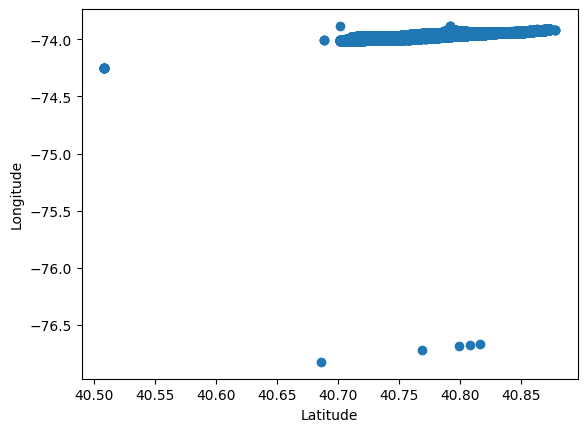

In [1120]:
import matplotlib.pyplot as plt

# Plot a scatter plot of two columns
plt.scatter(df2['Latitude'], df2['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [1121]:
df2.sort_values(by=['Longitude'])


,CMPLNT_FR_DT,Crime_Rating,Latitude,Longitude,Lat_Lon
115956,08/01/2007,7.1,40.685730,-76.822079,"(40.685730457, -76.822079173)"
74307,08/12/2007,7.1,40.768584,-76.719851,"(40.768584404, -76.719850665)"
76985,08/07/2007,7.1,40.799040,-76.682181,"(40.799039663, -76.682181238)"
68142,09/09/2007,6.4,40.807567,-76.671625,"(40.807566825, -76.671625241)"
76201,08/11/2007,7.0,40.816045,-76.661126,"(40.816044951, -76.661126063)"
...,...,...,...,...,...
11941,06/06/2021,8.5,40.872279,-73.911197,"(40.872279224000074, -73.91119747699997)"
43416,09/07/2009,6.4,40.701241,-73.889296,"(40.701241383, -73.889295682)"
86306,09/24/2019,7.1,40.791152,-73.884372,"(40.791151867000046, -73.884371919)"
86807,07/25/2019,7.1,40.791152,-73.884372,"(40.791151867000046, -73.884371919)"


In [1122]:
df2.drop(df2.loc[df2['Lat_Lon']=='(40.508302962, -74.25455981)'].index, inplace=True)
df2.drop(df2.loc[df2['Lat_Lon']=='(40.791151867000046, -73.884371919)'].index, inplace=True)
df2.drop(df2.loc[df2['Lat_Lon']=='(40.701241383, -73.889295682)'].index, inplace=True)
df2.drop(df2.loc[df2['Lat_Lon']=='(40.688709431, -74.009870635)'].index, inplace=True)
df2.drop(df2.loc[df2['Lat_Lon']=='(40.87757917200002, -73.92255214199997)'].index, inplace=True)
df2.drop(df2.loc[df2['Lat_Lon']=='(40.877579172, -73.922552142)'].index, inplace=True)
df2.drop(df2.loc[df2['Lat_Lon']=='(40.688709431, -74.009870635)'].index, inplace=True)
df2.drop(df2.loc[df2['Lat_Lon']=='(40.87757917200002, -73.92255214199997)'].index, inplace=True)
df2.drop(df2.loc[df2['Lat_Lon']=='(40.877579172, -73.922552142)'].index, inplace=True)
df2=df2.drop([115956,74307,76985,68142,76201])


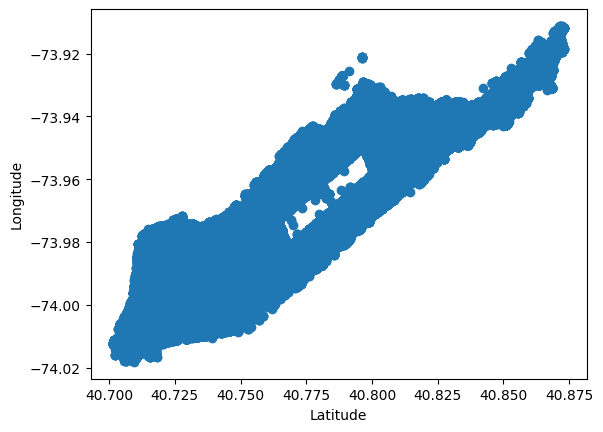

In [1123]:
plt.scatter(df2['Latitude'], df2['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [1124]:
df2=df2.loc[df2['Latitude'] < 40.830]

In [1125]:
df2=df2.loc[df2['Longitude'] < -73.933]

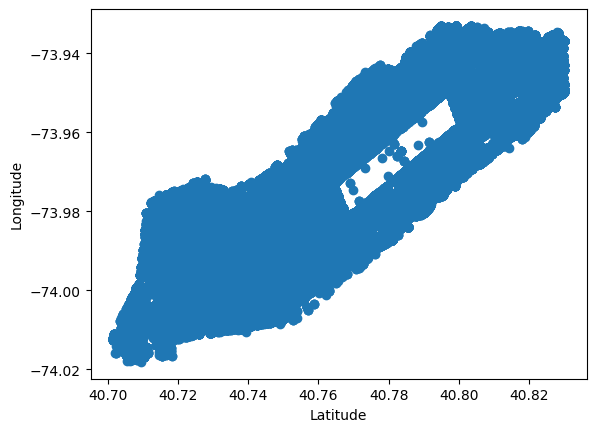

In [1126]:
plt.scatter(df2['Latitude'], df2['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [1127]:
df2

,CMPLNT_FR_DT,Crime_Rating,Latitude,Longitude,Lat_Lon
0,09/26/2018,7.1,40.803905,-73.952037,"(40.803905237, -73.952036608)"
2,11/24/2018,7.2,40.797317,-73.934456,"(40.797317468, -73.934455861)"
3,11/02/2018,7.0,40.827738,-73.947579,"(40.827738453, -73.947578589)"
4,02/25/2018,9.2,40.813089,-73.957980,"(40.813088658, -73.957979911)"
5,05/31/2018,8.5,40.793301,-73.948765,"(40.793300943, -73.948764998)"
...,...,...,...,...,...
130659,10/02/2018,7.0,40.719667,-73.984778,"(40.719667058, -73.984777725)"
130660,06/28/2018,7.1,40.731031,-73.988834,"(40.731030819, -73.988834279)"
130661,03/14/2018,4.5,40.754592,-73.999146,"(40.7545923, -73.99914602)"
130662,05/28/2018,7.0,40.716204,-73.996080,"(40.716204109, -73.996080279)"


In [1128]:
df2=df2.assign(CMPLNT_FR_DT=df2.CMPLNT_FR_DT.str[-4:])
df2['CMPLNT_FR_DT'] = df2['CMPLNT_FR_DT'].astype(int)
df2=df2.sort_values(by='CMPLNT_FR_DT')
df2

,CMPLNT_FR_DT,Crime_Rating,Latitude,Longitude,Lat_Lon
39962,1016,4.5,40.789918,-73.940747,"(40.789918335, -73.94074685)"
104492,1017,8.5,40.720759,-73.980466,"(40.720758821, -73.980466423)"
114077,1920,4.5,40.752125,-73.975559,"(40.752124928, -73.975559441)"
128102,1969,4.5,40.719017,-73.990052,"(40.719017126, -73.990052012)"
118021,2000,7.1,40.737555,-73.984084,"(40.737554542, -73.984084419)"
...,...,...,...,...,...
11722,2021,4.5,40.776561,-73.955642,"(40.77656091500006, -73.95564162699996)"
11725,2021,7.0,40.794150,-73.939869,"(40.79415025600008, -73.93986908699996)"
11726,2021,7.0,40.798986,-73.944618,"(40.79898610500004, -73.94461786899996)"
11705,2021,9.2,40.803706,-73.937914,"(40.80370636500004, -73.93791354799998)"


In [1129]:
df2=df2.sort_values(by='CMPLNT_FR_DT')
df2['CMPLNT_FR_DT'] = df2['CMPLNT_FR_DT'].astype(int)
df2=df2.loc[df2['CMPLNT_FR_DT'] > 2006]
df2=df2.reset_index().drop(['index'],axis=1)
df2

,CMPLNT_FR_DT,Crime_Rating,Latitude,Longitude,Lat_Lon
0,2007,7.1,40.766937,-73.986435,"(40.766937363, -73.986434779)"
1,2007,7.0,40.734854,-73.983122,"(40.734853568, -73.983121637)"
2,2007,9.2,40.726195,-73.989430,"(40.726194614, -73.989430387)"
3,2007,9.2,40.744919,-73.988799,"(40.744919266, -73.988799472)"
4,2007,8.5,40.765631,-73.991106,"(40.765631321, -73.991106394)"
...,...,...,...,...,...
100422,2021,8.5,40.805459,-73.952783,"(40.80545906000003, -73.95278320599994)"
100423,2021,8.4,40.798944,-73.942361,"(40.798943827000066, -73.94236052199994)"
100424,2021,7.0,40.788821,-73.942210,"(40.788821185000074, -73.94221038799998)"
100425,2021,8.5,40.826730,-73.952223,"(40.826730415000036, -73.95222250099994)"


In [1130]:
df2.drop(['CMPLNT_FR_DT','Latitude','Longitude'],axis=1).to_csv('NYC_just_done_with_this.csv')

In [1131]:
df2.drop(['CMPLNT_FR_DT','Latitude','Longitude'],axis=1).groupby('Lat_Lon').sum().to_csv('NYC_CRIME_SUM_final.csv')


In [1132]:
df11=df2.drop(['CMPLNT_FR_DT','Latitude','Longitude'],axis=1).groupby('Lat_Lon').sum()

In [1133]:
df11

,Crime_Rating
Lat_Lon,
"(40.701488814, -74.012544968)",64.1
"(40.701541003, -74.012191538)",53.2
"(40.701541003000045, -74.01219153799997)",14.2
"(40.701557457, -74.012321377)",15.5
"(40.701694767, -74.011628946)",7.1
...,...
"(40.82994857, -73.948964431)",53.8
"(40.829948570000056, -73.94896443099998)",13.0
"(40.829959123, -73.948010459)",82.2


In [1134]:
df11['Crime_Rating'] = np.log(df11['Crime_Rating'])


In [1135]:
df11

,Crime_Rating
Lat_Lon,
"(40.701488814, -74.012544968)",4.160444
"(40.701541003, -74.012191538)",3.974058
"(40.701541003000045, -74.01219153799997)",2.653242
"(40.701557457, -74.012321377)",2.740840
"(40.701694767, -74.011628946)",1.960095
...,...
"(40.82994857, -73.948964431)",3.985273
"(40.829948570000056, -73.94896443099998)",2.564949
"(40.829959123, -73.948010459)",4.409155


In [1136]:
df11.sort_values(by=['Crime_Rating'])


,Crime_Rating
Lat_Lon,
"(40.748229735000045, -74.00747942899994)",1.504077
"(40.73856130300004, -73.98042511899997)",1.504077
"(40.74536440900005, -73.99658381199998)",1.504077
"(40.763742526000044, -73.96206496499997)",1.504077
"(40.73864189500005, -73.98759166399999)",1.504077
...,...
"(40.789260224, -73.947710001)",7.353530
"(40.800694331, -73.941109286)",7.406771
"(40.756642042, -73.988371577)",7.631286


In [1137]:
df11=df11.sort_values(by=['Crime_Rating'])
df11=df11.reset_index()
df11

,Lat_Lon,Crime_Rating
0,"(40.748229735000045, -74.00747942899994)",1.504077
1,"(40.73856130300004, -73.98042511899997)",1.504077
2,"(40.74536440900005, -73.99658381199998)",1.504077
3,"(40.763742526000044, -73.96206496499997)",1.504077
4,"(40.73864189500005, -73.98759166399999)",1.504077
...,...,...
14026,"(40.789260224, -73.947710001)",7.353530
14027,"(40.800694331, -73.941109286)",7.406771
14028,"(40.756642042, -73.988371577)",7.631286
14029,"(40.742699299, -73.99865538)",7.696985


In [1138]:
df11['Crime_Rating'] =df11['Crime_Rating']-df11['Crime_Rating'][0]+0.825

In [1139]:
df11['Crime_Rating'] =df11['Crime_Rating']*1.335
df11

,Lat_Lon,Crime_Rating
0,"(40.748229735000045, -74.00747942899994)",1.101375
1,"(40.73856130300004, -73.98042511899997)",1.101375
2,"(40.74536440900005, -73.99658381199998)",1.101375
3,"(40.763742526000044, -73.96206496499997)",1.101375
4,"(40.73864189500005, -73.98759166399999)",1.101375
...,...,...
14026,"(40.789260224, -73.947710001)",8.910395
14027,"(40.800694331, -73.941109286)",8.981472
14028,"(40.756642042, -73.988371577)",9.281199
14029,"(40.742699299, -73.99865538)",9.368907


In [1140]:
df11.to_csv('NYC_sum_normalized.csv')